In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
"""
k-mean algorithm
step 1: initialize the centers of the clusters
step 2: clustering
step 3: re-calculate the new centers
step 4: --- repeat step 2-3 until new centers == old centers
"""

'\nk-mean algorithm\nstep 1: initialize the centers of the clusters\nstep 2: clustering\nstep 3: re-calculate the new centers\nstep 4: --- repeat step 2-3 until new centers == old centers\n'

In [39]:
means = [[1, 2], [4, 8], [9, 0]]
cov = [[1,0],[0,1]]
cluster_0 = np.random.multivariate_normal(means[0], cov, 1000)
cluster_1 = np.random.multivariate_normal(means[1], cov, 1000)
cluster_2 = np.random.multivariate_normal(means[2], cov, 1000)
all_data = np.concatenate((cluster_0, cluster_1, cluster_2))
labels = []

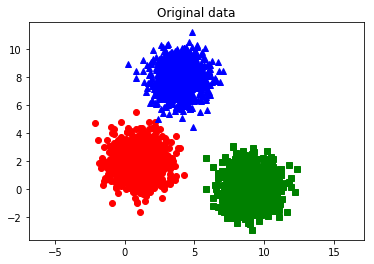

In [40]:
# plot data
def plot_data(c0, c1, c2):
    plt.plot(c0[:,0],c0[:,1],'o',color='red')
    plt.plot(c1[:,0],c1[:,1],'^b',color='blue')
    plt.plot(c2[:,0],c2[:,1],'rs',color='green')
    plt.axis('equal')
    plt.title('Original data')
    plt.show()
    
plot_data(cluster_0, cluster_1, cluster_2)

In [41]:
# step 0: number of cluster --> num
K = 3

In [42]:
# step 1: initialize the centers of the clusters
def initialize_centers(data, num):
    indexs = np.random.choice(data.shape[0], num)
    centers = data[indexs]
    return centers

In [43]:
# step 2: clustering -> get value for labels
from scipy.spatial import distance
def clustering(data, centers):
    dist = distance.cdist(data, centers)
    return np.argmin(dist, axis=1)

In [44]:
# step 3: re-calculate the new centers
def calculate_new_centers(data, labels, num):
    new_centers = np.zeros((3,2))
    for i in range(0,num):
        center = np.mean(data[labels == i,:], axis=0)
        new_centers[i,:] = center
    return new_centers

In [45]:
def plot_result(data, labels):
    plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')
    plt.title('Clustered data')
    plt.show()

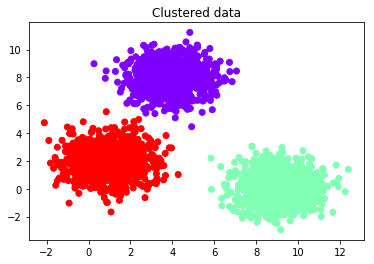

In [46]:
def kmean(data, num):
    centers = initialize_centers(data, num)
    labels = clustering(data, centers)
    new_centers = calculate_new_centers(data, labels, num)
    while True:
        labels = clustering(data, centers)
        new_centers = calculate_new_centers(data, labels, num)
        if ((new_centers == centers).all()):
            break
        else:
            centers = new_centers
    return centers, labels

centers, labels =  kmean(all_data, K)
plot_result(all_data, labels)

# Data is not globe-like

In [47]:
x = np.linspace(0,12,1000)
y = np.random.rand(1000,)+4
cluster_0_1 = np.vstack((x,y)).T
all_data_01 = np.concatenate((cluster_0_1, cluster_1, cluster_2))

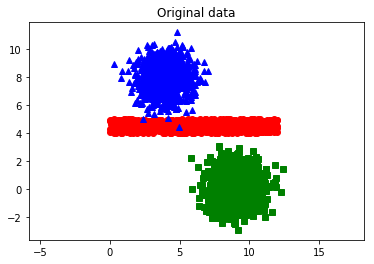

In [48]:
plot_data(cluster_0_1, cluster_1, cluster_2)

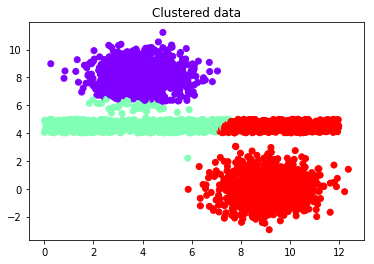

In [49]:
centers_01, labels_01 =  kmean(all_data_01, K)
plot_result(all_data_01, labels_01)

# Data is not equal between clusters

In [53]:
cluster_1_1 = np.random.multivariate_normal(means[1], cov, 10)
all_data_02 = np.concatenate((cluster_0, cluster_1_1, cluster_2))

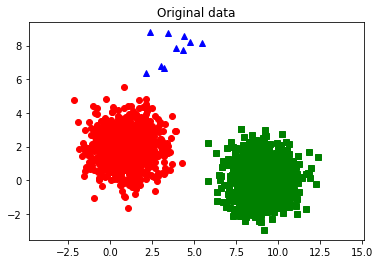

In [55]:
plot_data(cluster_0, cluster_1_1, cluster_2)

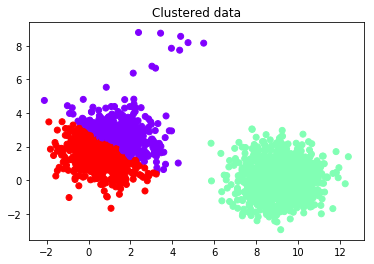

In [54]:
centers_02, labels_02 =  kmean(all_data_02, K)
plot_result(all_data_02, labels_02)

## use k-means++ for better initialization

In [56]:
# from now we will use the k-means lib of sklearn
from sklearn.cluster import KMeans

In [112]:
correct_init = np.array(means)

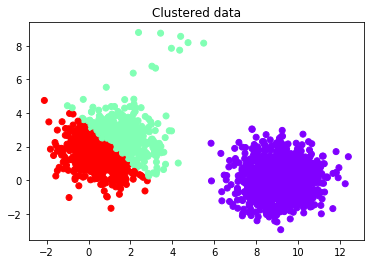

In [117]:
kmeans = KMeans(n_clusters=3).fit(all_data_02)
labels_02 = kmeans.labels_
plot_result(all_data_02, labels_02)

In [50]:
"""
Reference:
https://www.kdnuggets.com/2015/01/data-science-102-kmeans-clustering-not-free-lunch.html
https://www.kdnuggets.com/2017/03/naive-sharding-centroid-initialization-method.html
"""

'\nReference:\nhttps://www.kdnuggets.com/2015/01/data-science-102-kmeans-clustering-not-free-lunch.html\nhttps://www.kdnuggets.com/2017/03/naive-sharding-centroid-initialization-method.html\n'